In [1]:
from astropy.io import fits
import pyregion
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as cte 
import regions
from astropy.wcs import WCS
import cmasher as cm

# Color-color Diagram

Here we make a color-color diagram of each filter with the JWST data.

For this we take the color between two filters.

This archives are [here](https://www.dropbox.com/scl/fo/9qubko1p4cv604okuamwt/h?rlkey=y0mipdtvvrbch2x0vqt4yx2rm&dl=0)

In [2]:
'''Here we take the archival of the diferents colors'''

'''All have the direction of my computer'''

#0
rati_1800_1280 = fits.open('/home/roberto/Escritorio/ratio-f1800w-f1280w.fits')
color_1800_1280 = rati_1800_1280['SCI'] #archive of the color
bri_1800 = fits.open('/home/roberto/Escritorio/wr124-jwst-miri-2022-f1800w-radec.fits') #brightness of 1800w filter
#1
rati_1280_1130 = fits.open('/home/roberto/Escritorio/ratio-f1280w-f1130w.fits')
color_1280_1130 = rati_1280_1130['SCI']
bri_1280 = fits.open('/home/roberto/Escritorio/wr124-jwst-miri-2022-f1280w-radec.fits')
#2
rati_1130_770 = fits.open('/home/roberto/Escritorio/ratio-f1130w-f770w.fits')
color_1130_770 = rati_1130_770['SCI']
bri_1130 = fits.open('/home/roberto/Escritorio/wr124-jwst-miri-2022-f1130w-radec.fits')
#3
rati_770_444 = fits.open('/home/roberto/Escritorio/ratio-f770w-f444w.fits')
color_770_444 = rati_770_444['SCI']
bri_770 = fits.open('/home/roberto/Escritorio/wr124-jwst-miri-2022-f770w-radec.fits')
#4
rati_444_335 = fits.open('/home/roberto/Escritorio/ratio-f444w-f335m.fits')
color_444_335 = rati_444_335['SCI']
bri_444 = fits.open('/home/roberto/Escritorio/wr124-jwst-nircam-2022-f444w-radec.fits')
#5
rati_470_444 = fits.open('/home/roberto/Escritorio/ratio-f470n-f444w.fits')
color_470_444 = rati_470_444['SCI']
bri_470 = fits.open('/home/roberto/Escritorio/wr124-jwst-nircam-2022-f470n-radec.fits')
#6
rati_335_210 = fits.open('/home/roberto/Escritorio/ratio-f335m-f210m.fits')
color_335_210 = rati_335_210['SCI']
bri_335 = fits.open('/home/roberto/Escritorio/wr124-jwst-nircam-2022-f335m-radec.fits')
#7
rati_210_150 = fits.open('/home/roberto/Escritorio/ratio-f210m-f150w.fits')
color_210_150 = rati_210_150['SCI']
bri_210 = fits.open('/home/roberto/Escritorio/wr124-jwst-nircam-2022-f210m-radec.fits')
#8
rati_150_090 = fits.open('/home/roberto/Escritorio/ratio-f150w-f090w.fits')
color_150_090 = rati_150_090['SCI']
bri_150 = fits.open('/home/roberto/Escritorio/wr124-jwst-nircam-2022-f150w-radec.fits')
#9
rati_675_656 = fits.open('/home/roberto/Escritorio/ratio-f675w-f656n.fits')
color_675_656 = rati_675_656['SCI']
bri_675 = fits.open('/home/roberto/Escritorio/wr124-hst-1997-f675w-radec.fits')
#10
rati_675_555 = fits.open('/home/roberto/Escritorio/ratio-f675w-f555w.fits')
color_675_555 = rati_675_555['SCI']

#11
rati_150_656 = fits.open('/home/roberto/Escritorio/ratio-f150w-f656n.fits')
color_150_656 = rati_150_656['SCI']

#12
rati_150_675 = fits.open('/home/roberto/Escritorio/ratio-f150w-f675w.fits')
color_150_675 = rati_150_675['SCI']

#13
rati_090_656 = fits.open('/home/roberto/Escritorio/ratio-f090w-f656n.fits')
color_090_656 = rati_090_656['SCI']
bri_090 = fits.open('/home/roberto/Escritorio/wr124-jwst-nircam-2022-f090w-radec.fits')
#14
rati_210_656 = fits.open('/home/roberto/Escritorio/ratio-f210m-f656n.fits')
color_210_656 = rati_210_656['SCI']


In [3]:
'''In the code we use this for the data and the names'''
Filters = [(color_1800_1280,'1800-1280'), #0
           (color_1280_1130,'1280-1130'), #1
           (color_1130_770,'1130-770'), #2
           (color_770_444,'770-444'), #3
           (color_444_335,'444-335'), #4
           (color_470_444,'470-444'), #5
           (color_335_210,'335-210'), #6
           (color_210_150,'210-150'), #7
           (color_150_090,'150-090'), #8
           (color_675_656,'675-656'), #9
           (color_675_555,'675-555'), #10
           (color_150_656,'150-656'), #11
           (color_150_675,'150-675'), #12
           (color_090_656,'090-656'), #13
           (color_210_656,'210-656') #14
          ]

In [4]:
def Diagram_color_color(filter_1,filter_2,peso,factor=10,bins=100,nsample=1):
    f1, name1 = filter_1
    f2, name2 = filter_2
    m = np.isfinite(peso) & np.isfinite(f1.data) & np.isfinite(f2.data) 
    mean1 = np.average(f1.data[m],weights= peso[m])
    mean2 = np.average(f2.data[m],weights= peso[m])

    '''We find a typical value'''
    min1 = mean1/factor
    min2 = mean2/factor
    max1 = mean1*factor
    max2 = mean2*factor

    
    comun_pixel = (f1.data > min1) & (f2.data > min2) & (f1.data < max1) & (f2.data < max2)
    x1 = np.log10(f1.data[comun_pixel])
    x2 = np.log10(f2.data[comun_pixel])
    W = peso[comun_pixel]
    
    '''We make a histogram of the data'''
    H, yedges, xedges = np.histogram2d(
        x2[::nsample],
        x1[::nsample],
        bins=bins,
        range=[[np.log10(min1),np.log10(max1)], [np.log10(min2),np.log10(max2)]],
        weights=W[::nsample],#brillo de x1
        density=True,

    )
    
    HH = np.where(H == 0.0, np.nan, H)

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(
        H, 
        origin="lower", 
        cmap="inferno_r", 
        extent=[np.log10(min1),np.log10(max1),np.log10(min2),np.log10(max2)], 
        aspect="auto",
        interpolation="none",
    )

    fig.colorbar(im, ax=ax, label=rf"weight of {name1}")
    ax.set(
        xlabel=rf'color  filter{name1}',
        ylabel=rf'color  filter{name2}',
        title=rf'color-color diagram  {name1}-{name2}',
    )

Here we make de color-color diagram of the filters f1800w and f1280 and the filters f1280w and f1130w.

We put the brightnes (_subtracting the background_) of the first filter f1800w like the weight 

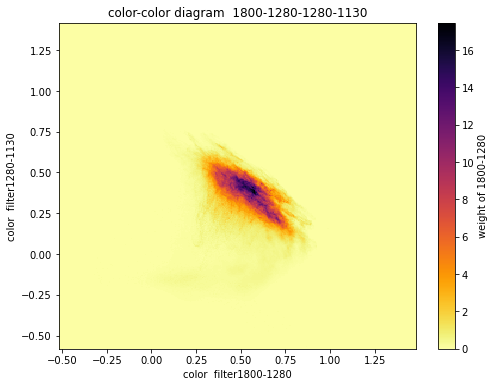

In [5]:
W = bri_1800['SCI'].data-95
W = np.where(W <= 0, np.nan, W)
Diagram_color_color(Filters[0],Filters[1],W,bins=300)

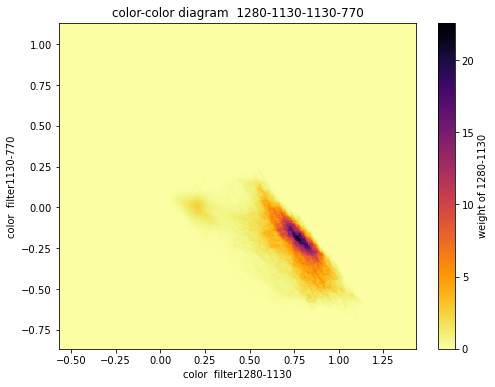

In [6]:
W = bri_1280['SCI'].data-26
W = np.where(W <= 0, np.nan, W)
Diagram_color_color(Filters[1],Filters[2],W,bins=300)

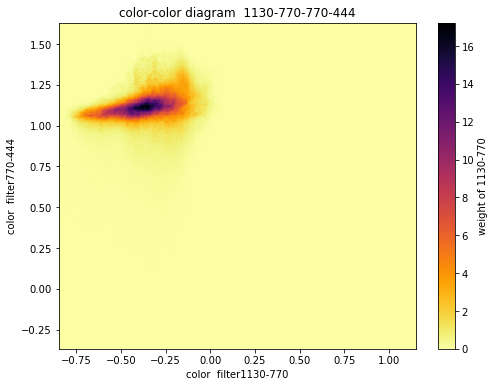

In [7]:
W = bri_1130['SCI'].data-23
W = np.where(W <= 0, np.nan, W)
Diagram_color_color(Filters[2],Filters[3],W,bins=300)

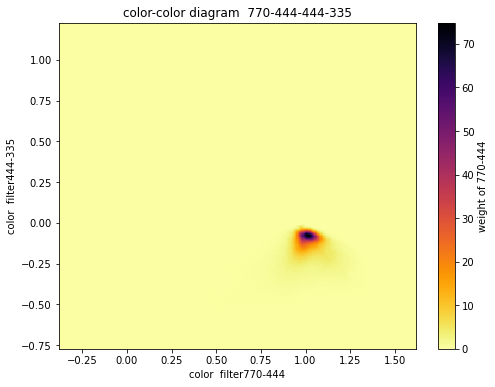

In [8]:
W = bri_770['SCI'].data-7
W = np.where(W <= 0, np.nan, W)
Diagram_color_color(Filters[3],Filters[4],W,bins=300)

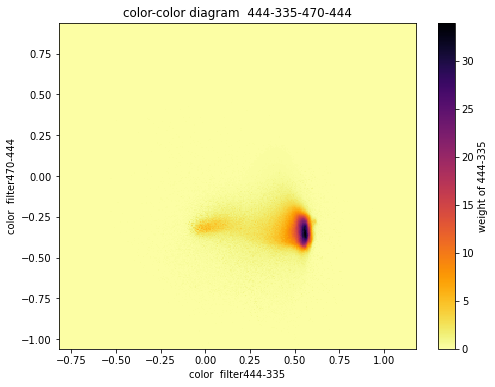

In [9]:
W = bri_444['SCI'].data-0.2
W = np.where(W <= 0, np.nan, W)
Diagram_color_color(Filters[4],Filters[5],W,bins=300)

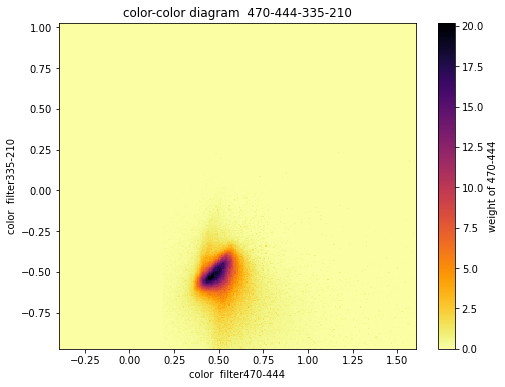

In [10]:
W = bri_470['SCI'].data-0.2
W = np.where(W <= 0, np.nan, W)
Diagram_color_color(Filters[5],Filters[6],W,bins=300)

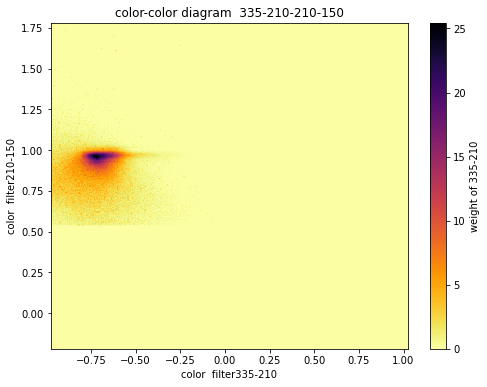

In [11]:
W = bri_335['SCI'].data-0.1
W = np.where(W <= 0, np.nan, W)
Diagram_color_color(Filters[6],Filters[7],W,bins=300)

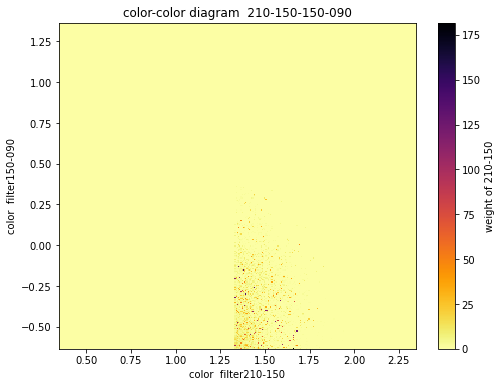

In [12]:
W = bri_210['SCI'].data-0.1
W = np.where(W <= 0, np.nan, W)
Diagram_color_color(Filters[7],Filters[8],W,bins=300)

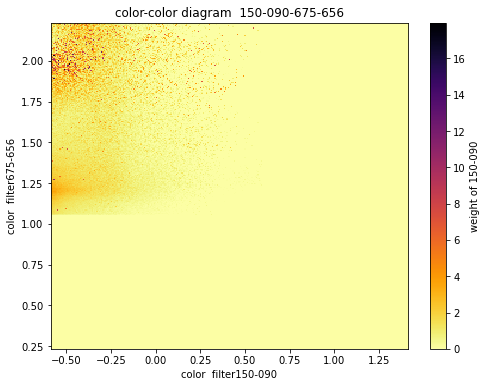

In [13]:
W = bri_150['SCI'].data-0.2
W = np.where(W <= 0, np.nan, W)
Diagram_color_color(Filters[8],Filters[9],W,bins=300)

Now we want to see and compare how it is only in the globules.

For this we take this regions.

In [6]:
'''Primero cargamos las ubicacionees de los globules que se encuentran en la carpeta M1-67'''
regs = regions.Regions.read('/home/roberto/globule-seminario/m1-67/m1-67-globules.reg', format="ds9")
regs = [_ for _ in regs if hasattr(_, 'center') and _.visual.get('marker') == "o"]

In [7]:
from astropy.table import QTable, Table
from astropy.coordinates import SkyCoord
c0 = SkyCoord.from_name('wr124', cache=True)

source_table = QTable(
    [
        {"ICRS": r.center, "Isolated": r.visual.get('markeredgewidth') == 3} 
        for r in regs
    ]
)

source_table["PA"] = c0.position_angle(source_table["ICRS"]).to(u.deg)
source_table["Sep"] = source_table["ICRS"].separation(c0).to(u.arcsec)
source_table["PA"].info.format = ".2f"
source_table["Sep"].info.format = ".2f"

source_table.show_in_notebook()

idx,ICRS,Isolated,PA,Sep
,"deg,deg",,deg,arcsec
0,"287.8779225,16.858874166666666",True,201.82,6.76
1,"287.87682416666667,16.860386666666667",True,262.48,6.35
2,"287.87825666666663,16.85882777777778",True,191.93,6.58
3,"287.87846541666664,16.85866027777778",True,185.20,7.07
4,"287.87877166666664,16.858544166666668",True,176.83,7.48
5,"287.87868416666663,16.858251111111112",False,179.25,8.52
6,"287.8772941666666,16.858095277777778",True,207.25,10.21
7,"287.87750291666663,16.857992777777778",True,202.73,10.24
8,"287.87696874999995,16.858633333333334",True,219.07,9.20


This is how we see a globule in the f1800w-f1280w color

Set OBSGEO-B to   -34.095956 from OBSGEO-[XYZ].
Set OBSGEO-H to 1695154734.210 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


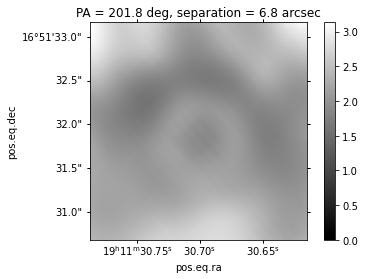

In [8]:
hdu = rati_1800_1280['SCI']
wcs = WCS(color_1800_1280)

j1, i1 = wcs.world_to_array_index(source_table[0]['ICRS'])
size = 40
yslice, xslice = slice(j1 - size, j1 + size), slice(i1 - size, i1 + size)
cutout = hdu.data[yslice, xslice]
wcutout = wcs.slice((yslice, xslice))

fig = plt.figure()
ax = fig.add_subplot(projection=wcutout)
im = ax.imshow(cutout, vmin=0.0, cmap=cm.neutral)
cb = fig.colorbar(im, ax=ax)
ax.set_title(f"PA = {source_table[0]['PA']:.1f}, separation = {source_table[0]['Sep']:.1f}")
...;

Now we make a mask where are our globules

In [9]:
size = 40
Map_= np.zeros((4839,4839))
for i in range(len(regs)):
    source_i = source_table[i]
    j1_i, i1_i = wcs.world_to_array_index(source_i['ICRS'])
    yslice_i, xslice_i = slice(j1_i - size, j1_i + size), slice(i1_i - size, i1_i + size)
    cutout_i = hdu.data[yslice_i, xslice_i]
    wcutout_i = wcs.slice((yslice_i, xslice_i))
    Map_[yslice_i,xslice_i]=True
    
Map_b = Map_ == 1

This is the localitations of our globules

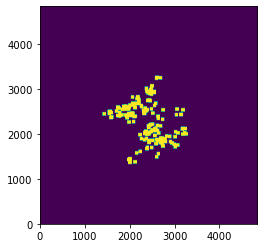

In [10]:
plt.imshow(Map_b,origin='lower')

In [13]:
def Diagram_color_color_globules(filter_1,filter_2,peso,factor=10,bins=100,nsample=1):
    '''First we make to all image'''
    f1, name1 = filter_1
    f2, name2 = filter_2
    m = np.isfinite(peso) & np.isfinite(f1.data) & np.isfinite(f2.data) 
    mean1 = np.average(f1.data[m],weights= peso[m])
    mean2 = np.average(f2.data[m],weights= peso[m])

    min1 = mean1/factor
    min2 = mean2/factor
    max1 = mean1*factor
    max2 = mean2*factor

    comun_pixel = (f1.data > min1) & (f2.data > min2) & (f1.data < max1) & (f2.data < max2) & m
    x1 = np.log10(f1.data[comun_pixel])
    x2 = np.log10(f2.data[comun_pixel])
    W = peso[comun_pixel]
    
    H, yedges, xedges = np.histogram2d(
        x2[::nsample],
        x1[::nsample],
        bins=bins,
        range=[[np.log10(min1),np.log10(max1)], [np.log10(min2),np.log10(max2)]],
        weights=W[::nsample],#brillo de x1,
        density=True,
    )
    
    '''only in the globules'''
    
    m = m & (Map_b==True) 
    
    comun_pixel = comun_pixel & (Map_b==True)
    x1 = np.log10(f1.data[comun_pixel])
    x2 = np.log10(f2.data[comun_pixel])
    W = peso[comun_pixel]
    
    H_g, yedges, xedges = np.histogram2d(
        x2[::nsample],
        x1[::nsample],
        bins=bins,
        range=[[np.log10(min1),np.log10(max1)], [np.log10(min2),np.log10(max2)]],
        weights=W[::nsample],#brillo de x1
        density=True,

    )

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(
        H_g, 
        origin="lower", 
        cmap="inferno_r", 
        extent=[np.log10(min1),np.log10(max1),np.log10(min2),np.log10(max2)], 
        aspect="auto",
        interpolation="none",
    )
    levels = H.max()*np.array([0.1,0.5])
    ax.contour(H,levels,
               origin="lower",
               extent=[np.log10(min1),np.log10(max1),np.log10(min2),np.log10(max2)],
               colors='k'
              )
    fig.colorbar(im, ax=ax, label=rf"weight of f1800w")
    ax.set(
        xlabel=rf'color  filter{name1}',
        ylabel=rf'color  filter{name2}',
        title=rf'Globules color-color diagram {name1}-{name2}',
    )
    
    fig.savefig(rf'color-color_diagram_with_contour_of-{name1}.pdf')

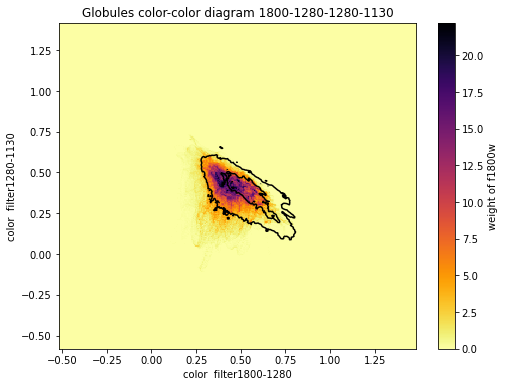

In [14]:
W = bri_1800['SCI'].data-95
W = np.where(W <= 0, np.nan, W)
Diagram_color_color_globules(Filters[0],Filters[1],W,bins=300)

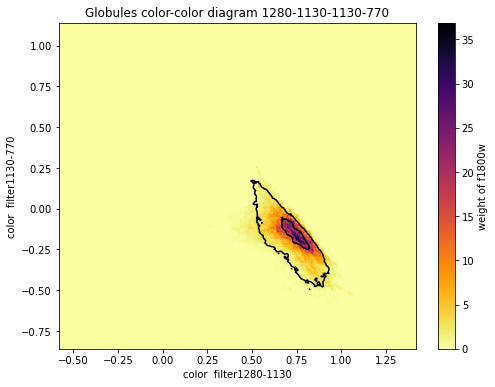

In [15]:
Diagram_color_color_globules(Filters[1],Filters[2],W,bins=300)

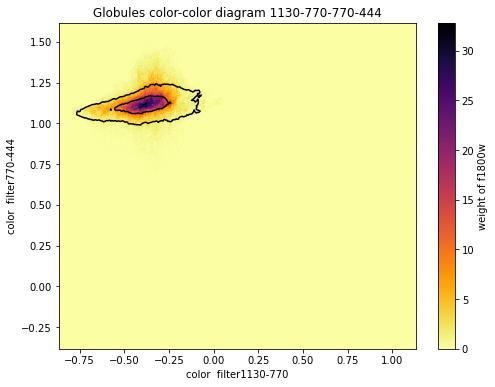

In [17]:
Diagram_color_color_globules(Filters[2],Filters[3],W,bins=300)

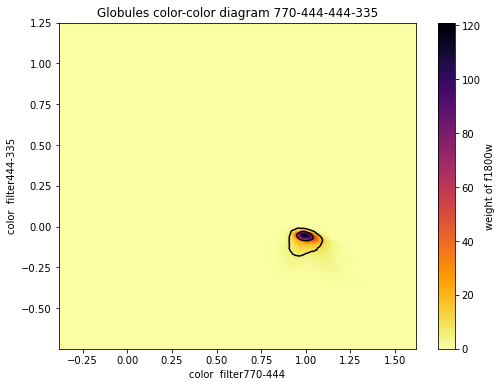

In [18]:
Diagram_color_color_globules(Filters[3],Filters[4],W,bins=300)

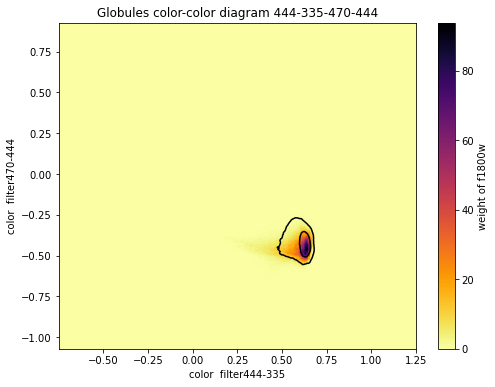

In [19]:
Diagram_color_color_globules(Filters[4],Filters[5],W,bins=300)

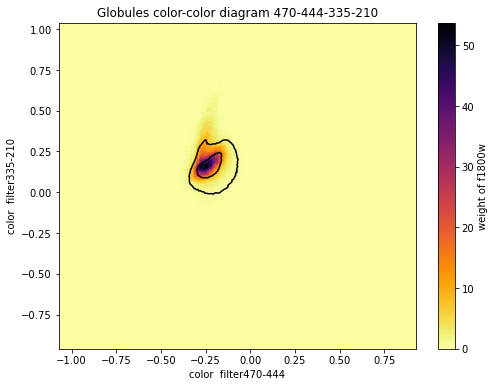

In [20]:
Diagram_color_color_globules(Filters[5],Filters[6],W,bins=300)

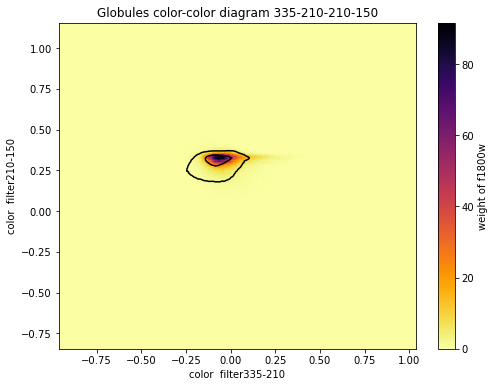

In [21]:
Diagram_color_color_globules(Filters[6],Filters[7],W,bins=300)

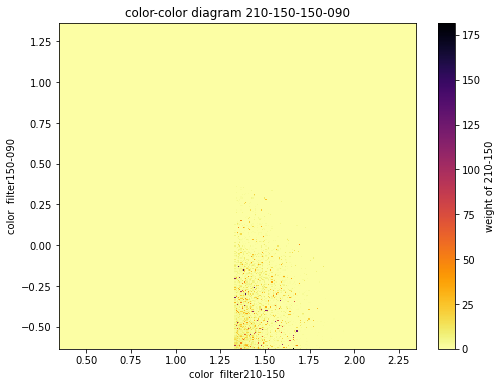

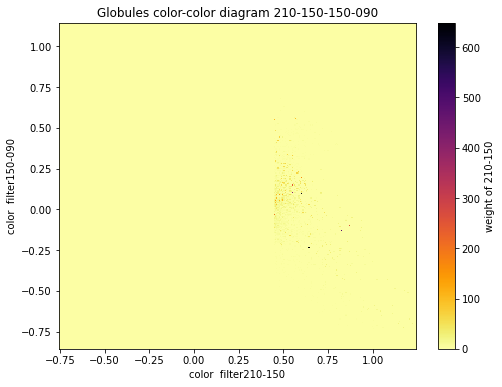

In [36]:
W = bri_210['SCI'].data-0.1
W = np.where(W <= 0, np.nan, W)
Diagram_color_color_globules(Filters[7],Filters[8],W,bins=300)

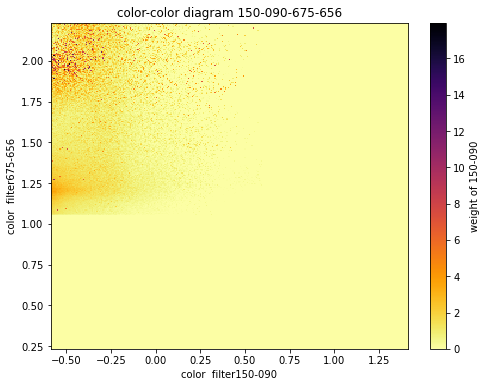

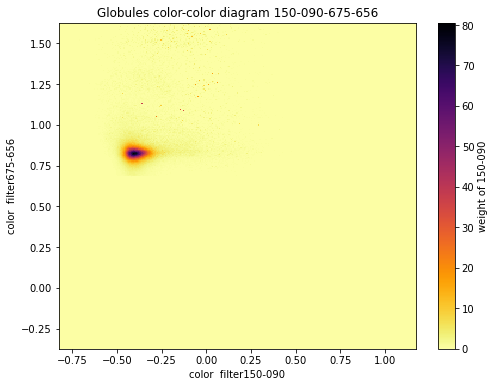

In [38]:
W = bri_150['SCI'].data-0.2
W = np.where(W <= 0, np.nan, W)
Diagram_color_color_globules(Filters[8],Filters[9],W,bins=300)